# Data Analysis And Data Preprocessing

In [1]:
CSV_DATA_PATH = '../Datasets/cats/data/cats.csv'
NEW_DATA_PATH = '../Datasets/data_final.pkl'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import os

if tf.test.gpu_device_name():
   print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [3]:
data = pd.read_csv(CSV_DATA_PATH)
print('Shape', data.shape)
data.head()

Shape (67145, 11)


,Unnamed: 0,id,url,type,age,gender,size,coat,breed,photos,med_photos
0,0,46744842,https://www.petfinder.com/cat/arianna-46744842...,Cat,Adult,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
1,1,46717321,https://www.petfinder.com/cat/ozzy-46717321/oh...,Cat,Adult,Male,Extra Large,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
2,2,46626338,https://www.petfinder.com/cat/zena-46626338/ca...,Cat,Senior,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
3,3,46620170,https://www.petfinder.com/cat/mika-46620170/ca...,Cat,Baby,Female,Small,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
4,4,46582751,https://www.petfinder.com/cat/ruby-46582751/fl...,Cat,Young,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...


In [4]:
missing_data = data.isnull().sum()
missing_data

Unnamed: 0        0
id                0
url               0
type              0
age               0
gender            0
size              0
coat          25133
breed             0
photos            0
med_photos        0
dtype: int64

In [5]:
# Percentage of missing values
print(missing_data.sum())
percent_missing = (missing_data.sum()/np.product(data.shape)) * 100
print(f'{percent_missing}% is missing')

25133
3.402812095938911% is missing


In [6]:
# Dropna
# Since the coat is a categorical feature, we decided to drop rows
data_dropped = data.dropna()
data_dropped

,Unnamed: 0,id,url,type,age,gender,size,coat,breed,photos,med_photos
3,3,46620170,https://www.petfinder.com/cat/mika-46620170/ca...,Cat,Baby,Female,Small,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
7,7,46463847,https://www.petfinder.com/cat/kingston-4646384...,Cat,Adult,Male,Medium,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
11,11,46305208,https://www.petfinder.com/cat/quinn-46305208/m...,Cat,Senior,Male,Medium,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
12,12,46301725,https://www.petfinder.com/cat/tazmania-fostere...,Cat,Adult,Female,Medium,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
13,13,46293180,https://www.petfinder.com/cat/nutmeg-46293180/...,Cat,Young,Male,Small,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
...,...,...,...,...,...,...,...,...,...,...,...
67140,70984,43781057,https://www.petfinder.com/cat/jasper-43781057/...,Cat,Baby,Male,Medium,Short,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
67141,70985,43773439,https://www.petfinder.com/cat/missy-43773439/o...,Cat,Adult,Female,Medium,Short,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
67142,70986,43773383,https://www.petfinder.com/cat/bandit-43773383/...,Cat,Young,Female,Large,Short,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
67143,70987,43773168,https://www.petfinder.com/cat/maxy-43773168/ut...,Cat,Adult,Male,Medium,Medium,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...


In [7]:
data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42012 entries, 3 to 67144
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  42012 non-null  int64 
 1   id          42012 non-null  int64 
 2   url         42012 non-null  object
 3   type        42012 non-null  object
 4   age         42012 non-null  object
 5   gender      42012 non-null  object
 6   size        42012 non-null  object
 7   coat        42012 non-null  object
 8   breed       42012 non-null  object
 9   photos      42012 non-null  object
 10  med_photos  42012 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.8+ MB


In [8]:
data_dropped = data_dropped.replace(
    {'size': {'Medium':'Middle'}}
)

In [9]:
categorical_features = ['age', 'gender', 'size', 'coat', 'breed']

In [10]:
for cat in categorical_features:
    print(data_dropped[cat].value_counts(ascending=False))
    print()

Baby      15464
Adult     14999
Young      9641
Senior     1908
Name: age, dtype: int64

Female    25539
Male      16473
Name: gender, dtype: int64

Middle         27298
Small           8525
Large           5634
Extra Large      555
Name: size, dtype: int64

Short       26439
Long         9306
Medium       6207
Hairless       60
Name: coat, dtype: int64

Persian                 3101
American Shorthair      2312
Dilute Calico           2256
Dilute Tortoiseshell    2131
Domestic Long Hair      1944
                        ... 
LaPerm                    11
Burmilla                   6
Chinchilla                 3
Canadian Hairless          1
York Chocolate             1
Name: breed, Length: 67, dtype: int64



In [11]:
# Drop coat that contaning few examples
data_dropped = data_dropped.groupby('coat').filter(lambda x : len(x) >= 100)

In [12]:
# One-hot Encoding
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder()

In [13]:
data_encoded = oe.fit_transform(data_dropped[categorical_features])
oe.categories_

[array(['Adult', 'Baby', 'Senior', 'Young'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Extra Large', 'Large', 'Middle', 'Small'], dtype=object),
 array(['Long', 'Medium', 'Short'], dtype=object),
 array(['Abyssinian', 'American Bobtail', 'American Curl',
        'American Shorthair', 'American Wirehair', 'Applehead Siamese',
        'Balinese', 'Bengal', 'Birman', 'Bombay', 'British Shorthair',
        'Burmese', 'Burmilla', 'Calico', 'Canadian Hairless', 'Chartreux',
        'Chausie', 'Chinchilla', 'Cornish Rex', 'Cymric', 'Devon Rex',
        'Dilute Calico', 'Dilute Tortoiseshell', 'Domestic Long Hair',
        'Domestic Medium Hair', 'Domestic Short Hair', 'Egyptian Mau',
        'Exotic Shorthair', 'Extra-Toes Cat - Hemingway Polydactyl',
        'Havana', 'Himalayan', 'Japanese Bobtail', 'Javanese', 'Korat',
        'LaPerm', 'Maine Coon', 'Manx', 'Munchkin', 'Nebelung',
        'Norwegian Forest Cat', 'Ocicat', 'Oriental Long Hair',
        'Oriental Sho

In [14]:
def get_cat_string(cat, value):
    if(cat == 'age'):
        return oe.categories_[0][int(value)]
    elif(cat == 'gender'):
        return oe.categories_[1][int(value)]
    elif(cat == 'size'):
        return oe.categories_[2][int(value)]
    elif(cat == 'coat'):
        return oe.categories_[3][int(value)]
    elif(cat == 'breed'):
        return oe.categories_[4][int(value)]

In [15]:
col_names = []
for j in oe.categories_:
    for i in j:
        col_names.append(i)
#col_names

In [16]:
data_encoded_df = pd.DataFrame(data_encoded.toarray(), columns=col_names)
data_encoded_df.index = data_dropped.index
data_encoded_df

,Adult,Baby,Senior,Young,Female,Male,Extra Large,Large,Middle,Small,...,Sphynx - Hairless Cat,Tabby,Tiger,Tonkinese,Torbie,Tortoiseshell,Turkish Angora,Turkish Van,Tuxedo,York Chocolate
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67140,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
67141,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
67142,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
67143,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Correlation map for temp choice on labels
def get_corr_map(data, title=None, large=False):
    corr = data.corr()
    if(large):
        plt.figure(figsize=(16, 16), dpi=300, facecolor='w', edgecolor='k')
    else:
        plt.figure(figsize=(4, 4), dpi=100, facecolor='w', edgecolor='k')
    colormap = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
    plt.gca().set_xticks([x - 0.5 for x in plt.gca().get_xticks()][1:], minor='true')
    plt.gca().set_yticks([y - 0.5 for y in plt.gca().get_yticks()][1:], minor='true')
    plt.grid(which='minor')

    plt.gca().xaxis.tick_bottom()
    plt.colorbar(colormap)
    if(title):
        plt.title(title)
    else:
        plt.title('Correlation Map')
    plt.show()
    return corr

In [18]:
def create_dir(path):
    if not os.path.exists(path.rsplit('\\', 1)[0]):
        os.makedirs(path.rsplit('\\',1)[0])

In [19]:
# Chekpoints callback function
def make_checkpoints(name):
    #create_dir(path)
    return callbacks.ModelCheckpoint(filepath=name+'.ckpt')

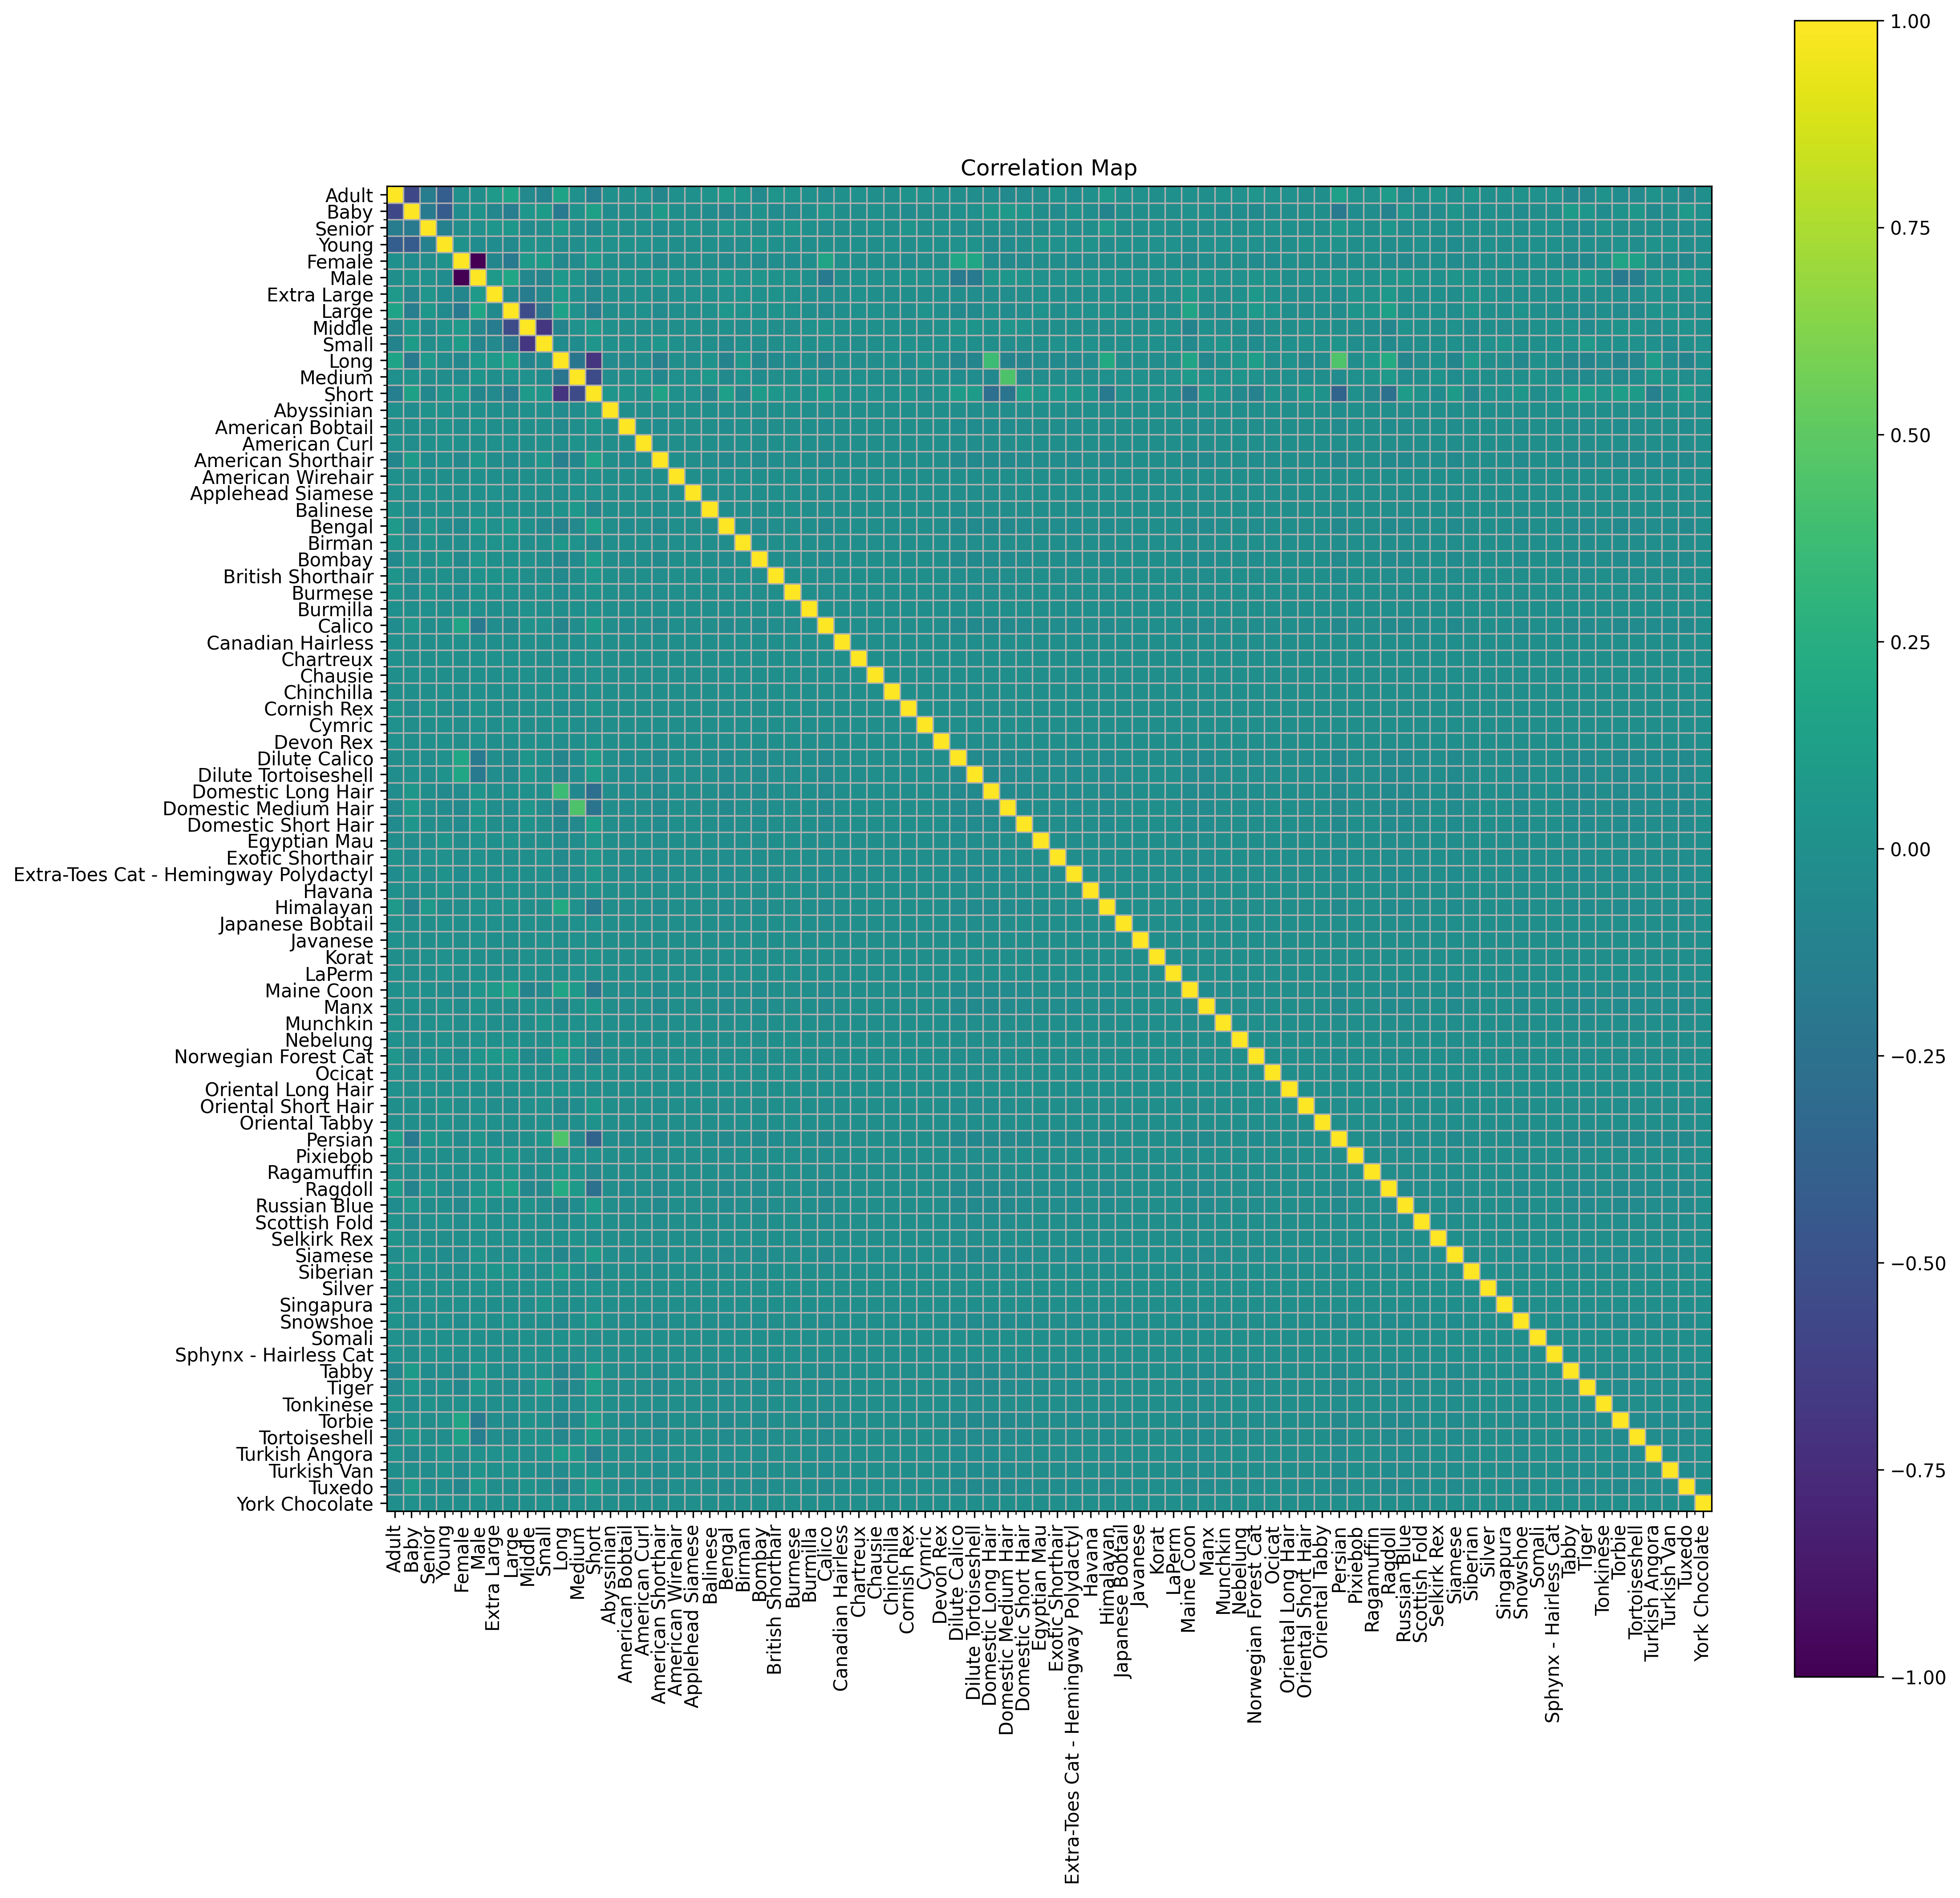

,Adult,Baby,Senior,Young,Female,Male,Extra Large,Large,Middle,Small,...,Sphynx - Hairless Cat,Tabby,Tiger,Tonkinese,Torbie,Tortoiseshell,Turkish Angora,Turkish Van,Tuxedo,York Chocolate
Adult,1.000000,-0.568922,-0.162325,-0.406248,0.005592,-0.005592,0.082758,0.162869,-0.057014,-0.093972,...,0.008572,-0.069881,-0.043430,0.024738,-0.030231,-0.034179,0.020921,-0.003006,-0.062951,-0.003636
Baby,-0.568922,1.000000,-0.166539,-0.416794,-0.028272,0.028272,-0.076785,-0.148293,0.048423,0.090108,...,-0.015492,0.093502,0.051421,-0.027582,0.021521,0.057438,-0.040115,-0.007595,0.080340,0.006391
Senior,-0.162325,-0.166539,1.000000,-0.118920,-0.009873,0.009873,0.040929,0.056999,-0.039078,-0.013594,...,0.008018,-0.028084,-0.027380,0.028438,-0.010192,-0.010721,-0.004321,-0.020171,-0.019243,-0.001064
Young,-0.406248,-0.416794,-0.118920,1.000000,0.030957,-0.030957,-0.026446,-0.043626,0.028741,0.010405,...,0.004041,-0.013765,0.004033,-0.010614,0.014796,-0.021657,0.024331,0.022123,-0.010935,-0.002664
Female,0.005592,-0.028272,-0.009873,0.030957,1.000000,-1.000000,-0.081390,-0.184381,0.072852,0.093031,...,-0.006578,-0.067608,-0.062643,0.002716,0.167372,0.133482,-0.009844,-0.034083,-0.077068,-0.006081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tortoiseshell,-0.034179,0.057438,-0.010721,-0.021657,0.133482,-0.133482,-0.018189,-0.040093,0.020382,0.014981,...,-0.004266,-0.030665,-0.030241,-0.010204,-0.035943,1.000000,-0.018649,-0.020060,-0.034843,-0.000821
Turkish Angora,0.020921,-0.040115,-0.004321,0.024331,-0.009844,0.009844,0.010001,0.020138,-0.017530,0.000883,...,-0.002815,-0.020236,-0.019956,-0.006734,-0.023719,-0.018649,1.000000,-0.013238,-0.022993,-0.000542
Turkish Van,-0.003006,-0.007595,-0.020171,0.022123,-0.034083,0.034083,0.007461,0.026720,0.000942,-0.025895,...,-0.003028,-0.021768,-0.021466,-0.007243,-0.025514,-0.020060,-0.013238,1.000000,-0.024733,-0.000583
Tuxedo,-0.062951,0.080340,-0.019243,-0.010935,-0.077068,0.077068,-0.010351,-0.015096,0.017601,-0.005143,...,-0.005260,-0.037808,-0.037285,-0.012581,-0.044316,-0.034843,-0.022993,-0.024733,1.000000,-0.001012


In [20]:
# From this graph, we can find many facts
get_corr_map(data_encoded_df, large=True)

In [21]:
# Find related images from med_photos column
import re
from os import walk
#from tqdm import trange

pattern = r"\/(\d+)\/"

def find_file(breed, name):
    _, _, files = next(walk(f'../Datasets/cats/images/{breed}'))
    for file in files:
        #print(file, breed, name)
        if(name in file):
            return file
    return None

def match_file(df):
    result = []
    for i, row in df.iterrows():
        breed = row['breed']
        photo = find_file(breed, re.findall(r"\/(\d+)\/", row['med_photos'])[0])
        #print(photo)
        result.append(f'{breed}/{photo}')
        
    return pd.Series(result, index=df.index)

In [22]:
# Drop columns/rows and Parse photos
# We use med_photos
data_final = data_encoded_df.copy()
data_final['image'] = match_file(data_dropped)    # Adding new column - image path
data_final = data_final.drop(data_final[(data_final['image'].str.contains('None'))].index)     # Drop None images, there are 13
data_final

,Adult,Baby,Senior,Young,Female,Male,Extra Large,Large,Middle,Small,...,Tabby,Tiger,Tonkinese,Torbie,Tortoiseshell,Turkish Angora,Turkish Van,Tuxedo,York Chocolate,image
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abyssinian/46620170_3.jpg
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abyssinian/46463847_8.jpg
11,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abyssinian/46305208_12.jpg
12,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abyssinian/46301725_13.jpg
13,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abyssinian/46293180_14.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67140,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Tuxedo/43781057_7295.jpg
67141,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Tuxedo/43773439_7304.jpg
67142,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Tuxedo/43773383_7305.jpg
67143,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Tuxedo/43773168_7306.jpg


In [23]:
data_final.to_pickle(NEW_DATA_PATH)

# Imports

In [24]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import random

In [25]:
# Import ml libraries
from tensorflow.keras import models, layers, optimizers, callbacks
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf

if tf.test.gpu_device_name():
   print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [26]:
SEED = 666
DATA_FILE = '../Datasets/data_final.pkl'
IMAGES_DIR = '../Datasets/cats/images'
FIGURES_DIR = '../Figures/'
RESOLUTION = 128
TEST_OUT_DIR_PREFIX = './final_combined'

In [27]:
random.seed(SEED)
np.random.seed(SEED)

In [28]:
data = pd.read_pickle(DATA_FILE)
data

,Adult,Baby,Senior,Young,Female,Male,Extra Large,Large,Middle,Small,...,Tabby,Tiger,Tonkinese,Torbie,Tortoiseshell,Turkish Angora,Turkish Van,Tuxedo,York Chocolate,image
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abyssinian/46620170_3.jpg
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abyssinian/46463847_8.jpg
11,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abyssinian/46305208_12.jpg
12,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abyssinian/46301725_13.jpg
13,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abyssinian/46293180_14.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67140,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Tuxedo/43781057_7295.jpg
67141,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Tuxedo/43773439_7304.jpg
67142,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Tuxedo/43773383_7305.jpg
67143,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Tuxedo/43773168_7306.jpg


In [29]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [30]:
# Load images from paths stored in the dataframe
def load_images(df):
    images = []
    for path in df['image']:
        #print(os.path.join(IMAGES_DIR, path))
        img = load_img(os.path.join(IMAGES_DIR, path), target_size=(RESOLUTION, RESOLUTION))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        #img = cv2.imread(os.path.join(IMAGES_DIR, path), cv2.COLOR_RGB2BGR)
        #img = cv2.resize(img, (RESOLUTION, RESOLUTION))
        images.append(img.astype(np.float32) / 255.0)
        #images.append(img)
    return np.vstack(images)

In [31]:
images = load_images(data)

In [32]:
'''
get_cat_string('age', np.argmax(data.iloc[r, 0:4])
'''

"\nget_cat_string('age', np.argmax(data.iloc[r, 0:4])\n"

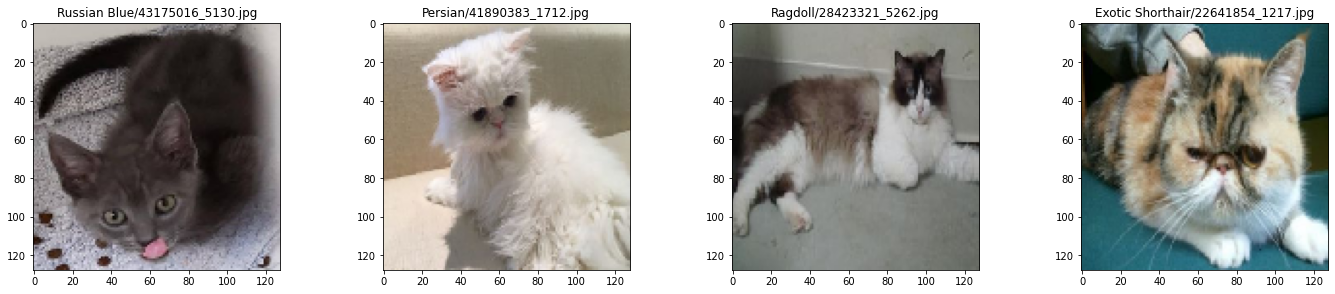

In [33]:
# Plotting 4 cats with their matching info
fig = plt.figure(figsize=(24, 10))
for i, r in enumerate([random.randint(0, images.shape[0]) for _ in range(4)]):
    ax = plt.subplot(2, 4, i + 1)
    ax.set_title(data.iloc[r, -1])
    ax.imshow(images[r])

In [34]:
# Plot graphs functions
def plot_accuracy(history, path):
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label = 'Accuracy_Val')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.savefig(path)
    plt.show()
def plot_loss(history, path):
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label = 'Loss_Val')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    plt.savefig(path)
    plt.show()

In [35]:
label_cols = ['Long', 'Medium', 'Short']

In [ ]:
# Datasets
features = data.drop(label_cols, axis=1)
labels = data[label_cols]

# Split
X_cat_train, X_cat_test, y_train, y_test = train_test_split(
    features, 
    labels, 
    test_size=0.1, 
    random_state=1)
X_cat_train, X_cat_val, y_train, y_val = train_test_split(
    X_cat_train, y_train, test_size=0.2, random_state=1)

# Load images from paths stored in each dataframe
X_img_train = load_images(X_cat_train)
X_img_test = load_images(X_cat_test)
X_img_val = load_images(X_cat_val)

# Remove the image column containing paths
X_cat_train = X_cat_train.drop(['image'], axis=1)
X_cat_test = X_cat_test.drop(['image'], axis=1)
X_cat_val = X_cat_val.drop(['image'], axis=1)

print(X_cat_train.shape, X_cat_test.shape, X_cat_val.shape)
print(X_img_train.shape, X_img_test.shape, X_img_val.shape)

# Training

In [ ]:
from tensorflow.keras import Input, Model
from sklearn.metrics import confusion_matrix

## Test 1

In [ ]:
# Name for outputs
n = os.path.join(TEST_OUT_DIR_PREFIX + '_0', 'final_combine')
create_dir(n)

In [ ]:
# Categorical Features - Input Layer 1
input_cat = Input(shape=(77,))

x_cat = layers.Dense(128, activation='relu')(input_cat)
x_cat = layers.Dense(256, activation='relu')(x_cat)
x_cat = layers.Dense(512, activation='relu')(x_cat)

x_cat = Model(inputs=input_cat, outputs=x_cat)

x_cat.summary()

In [ ]:
# Visual Features - Input Layer 2
input_img = Input(shape=(RESOLUTION, RESOLUTION, 3))

x_img = layers.Conv2D(32, (3, 3), activation='relu')(input_img)
x_img = layers.MaxPooling2D((2, 2))(x_img)
x_img = layers.Conv2D(64, (3, 3), activation='relu')(x_img)
x_img = layers.MaxPooling2D((2, 2))(x_img)
x_img = layers.Conv2D(128, (3, 3), activation='relu')(x_img)
x_img = layers.MaxPooling2D((2, 2))(x_img)
x_img = layers.Flatten()(x_img)

x_img = Model(inputs=input_img, outputs=x_img)

x_img.summary()

In [ ]:
# Combine Model
combine_input = layers.Concatenate(axis=1)([x_cat.output, x_img.output])

x_combine = layers.Dropout(0.3)(combine_input)
x_combine = layers.Dense(512, activation='relu')(x_combine)
x_combine = layers.Dense(3, activation='softmax')(x_combine)

model = Model(inputs=[x_cat.input, x_img.input], outputs = x_combine)
model.summary()

In [ ]:
epochs = 20
lr = 0.01
bs = 64 # breaks the network
opt = optimizers.SGD(lr=lr, momentum=0.9, decay=lr/epochs)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(
    x = [X_cat_train, X_img_train],
    y = y_train,
    validation_data = ([X_cat_val, X_img_val], y_val),
    batch_size=bs,
    steps_per_epoch = len(y_train) / bs,
    epochs=epochs,
    callbacks=[make_checkpoints(n)]
)

In [ ]:
# Show and Export graphs
plot_accuracy(history, f'{n}_E{str(epochs)}_Lr{str(lr)}_acc.png')
plot_loss(history, f'{n}_E{str(epochs)}_Lr{str(lr)}_loss.png')

In [ ]:
import seaborn as sns
y_pred = model.predict([X_cat_test, X_img_test])
confusion_mat = confusion_matrix(np.array(y_test).argmax(axis=1), np.array(y_pred).argmax(axis=1))
print(confusion_mat)
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mat, annot=True, fmt='g')
#c.set(xticklabels=br, yticklabels=br)
plt.savefig(FIGURES_DIR+'final_combined_0/CNN_heatmap_E_'+str(epochs)+'_LR_'+str(lr)+'.png')

In [ ]:
tp_1 = confusion_mat[0][0]
tn_1 = confusion_mat[1][1] + confusion_mat[1][2] + confusion_mat[2][1] + confusion_mat[2][2]
fp_1 = confusion_mat[0][1] + confusion_mat[0][2]
fn_1 = confusion_mat[1][0] + confusion_mat[2][0]
print('For coat num.1 : ', tp_1, tn_1, fp_1, fn_1)